In [103]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [119]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
file_path = 'crypto_market_data.csv'
market_data_df = pd.read_csv(file_path, index_col="coin_id")
# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [121]:
# Generate summary statistics
(df.describe())


,price,volume
count,3.000000,3.000000e+00
mean,17716.666667,2.500000e+10
std,27994.478622,2.291288e+10
min,150.000000,5.000000e+09
25%,1575.000000,1.250000e+10
50%,3000.000000,2.000000e+10
75%,26500.000000,3.500000e+10
max,50000.000000,5.000000e+10


### Prepare the Data

In [122]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
normalized_data = scaler.fit_transform(market_data_df[columns_to_normalize])



In [123]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(market_data_df, index=market_data_df.index, columns=market_data_df.columns)

# Copy the crypto names from the original data
scaled_df['coin_id'] = market_data_df.index
# Set the coinid column as index
scaled_df.set_index('coin_id', inplace=True)

# Display sample data
(scaled_df.head(10))

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


### Find the Best Value for k Using the Original Scaled DataFrame.

c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

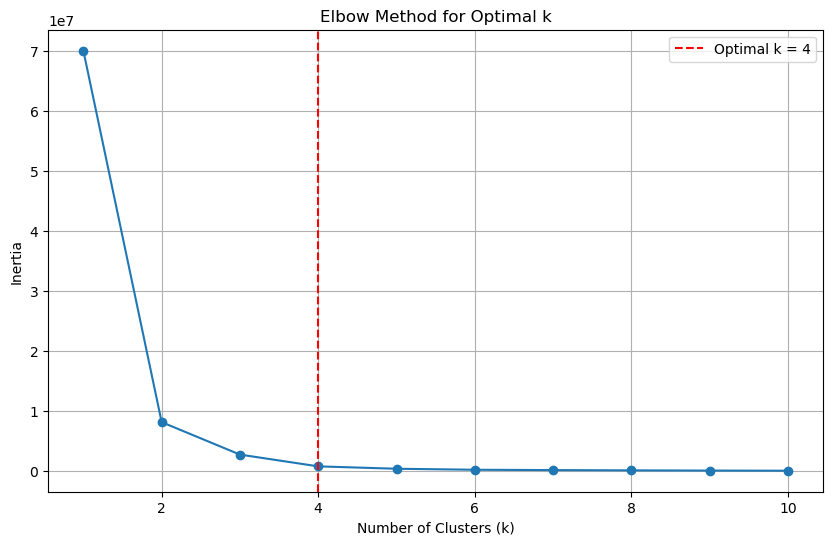

In [124]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
# Create an empty list to store the inertia values
inertia_values = []
k_values = list(range(1, 11))
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = pd.DataFrame({'k': k_values, 'Inertia': inertia_values})


# Create a DataFrame with the data to plot the Elbow curve
# Display the DataFrame
plt.figure(figsize=(10, 6))
plt.plot(elbow_data['k'], elbow_data['Inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.axvline(x=4, color='r', linestyle='--', label='Optimal k = 4')  # Adjust the line as needed
plt.legend()
plt.grid()
plt.show()

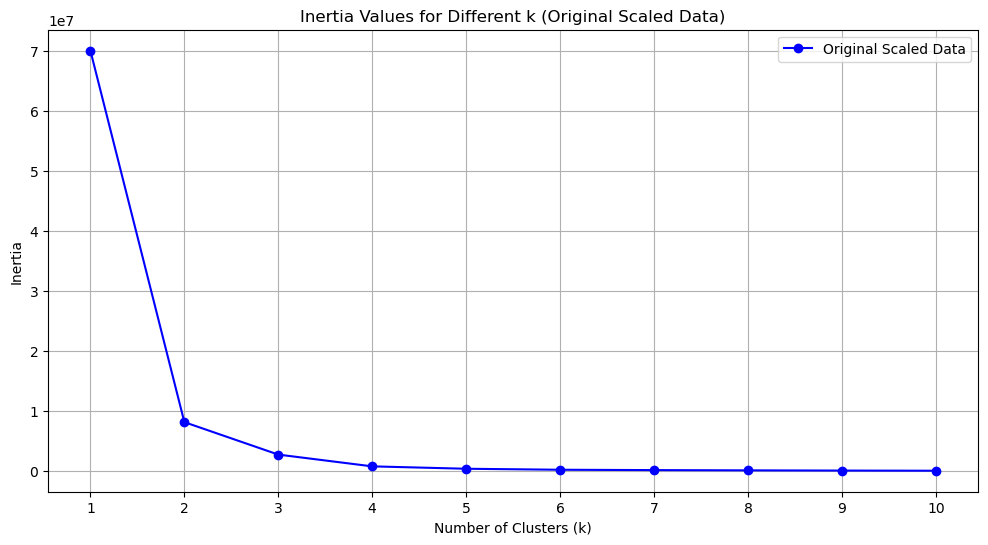

In [125]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(12, 6))
plt.plot(k_values, inertia_values, marker='o', label='Original Scaled Data', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia Values for Different k (Original Scaled Data)')
plt.xticks(k_values)
plt.grid()
plt.legend()
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**
4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [126]:
# Initialize the K-Means model using the best value for k
best_k = 4
scaled = KMeans(n_clusters=best_k, random_state=42)


In [146]:
# Ensure df is defined and contains the necessary columns
if 'df' not in globals():
    df = pd.DataFrame(index=scaled_df.index)

# Fit the K-Means model using the scaled data
kmeans_scaled = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(scaled_df)

# Ensure df has the same number of rows as scaled_df
if len(df) != len(scaled_df):
    df = df.iloc[:len(scaled_df)]

df['cluster'] = kmeans_scaled.fit_predict(scaled_df)


c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


ValueError: Length of values (41) does not match length of index (3)

In [142]:
# Predict the clusters to group the cryptocurrencies using the scaled data
df['cluster'] = "predicted_clusters"
cluster = kmeans_scaled.predict(scaled_df)


# View the resulting array of cluster values.
print("Predicted cluster values:")
cluster

Predicted cluster values:


array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 3, 0, 0, 0, 2])

In [141]:
# Create a copy of the DataFrame
df_copy = df.copy()

In [147]:
# Add a new column to the DataFrame with the predicted clusters
df['cluster'] = predicted_clusters
# Display sample data
print("Sample data with predicted clusters:")
(df.sample(5))

ValueError: Length of values (41) does not match length of index (3)

KeyError: 'price_change_percentage_24h'

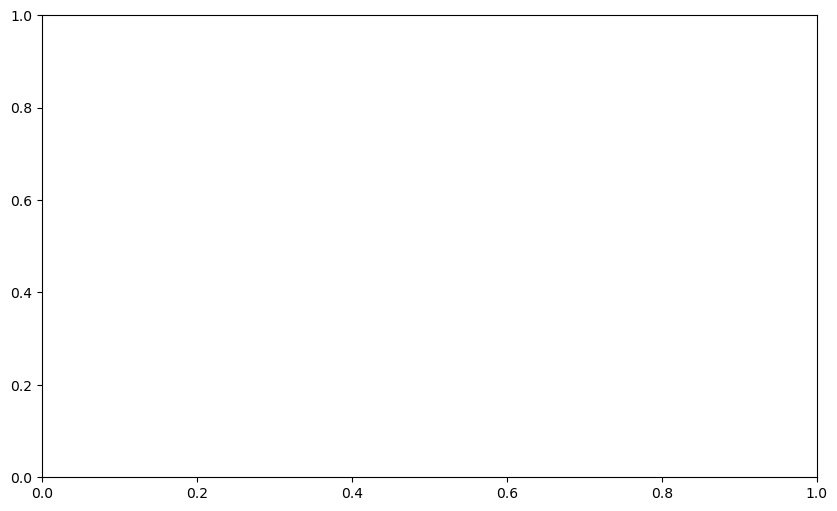

In [145]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scatter = df.plot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c='predicted_cluster',
    colormap='rainbow',
    alpha=0.7,
    figsize=(10, 6)
)

# Add titles and labels
plt.title("Scatter Plot of Price Change Percentages")
plt.xlabel("Price Change Percentage (24h)")
plt.ylabel("Price Change Percentage (7d)")
plt.grid(True)

# Show the plot
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [148]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)


In [149]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_array = pca_model.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=pca_array, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame. 
(pca_df.head(5))


,PC1,PC2,PC3
0,-341.800963,-51.366775,12.525471
1,-249.420466,24.117548,-14.231466
2,-402.614721,-118.710737,24.838397
3,-406.752437,-79.487286,1.566331
4,-382.429948,-103.431959,16.753073


In [150]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

explained_variance_df = pd.DataFrame({
    'Principal Component': ['PC1', 'PC2', 'PC3'],
    'Explained Variance Ratio': explained_variance
})

(explained_variance_df)


,Principal Component,Explained Variance Ratio
0,PC1,0.976037
1,PC2,0.023028
2,PC3,0.000748


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [151]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
pca_model = PCA(n_components=3)
pca_array = pca_model.fit_transform(scaled_df)

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(data=pca_array, columns=['PC1', 'PC2', 'PC3'])


# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_df['coin_id']


# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)


# Display sample data
(pca_df.head())


KeyError: 'coin_id'

### Find the Best Value for k Using the PCA Data

In [152]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(pca_df[['PC1', 'PC2', 'PC3']])  # Use only the PCA columns
    inertia_values.append(kmeans_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
(elbow_df)


c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

,k,inertia
0,1,6.997052e+07
1,2,8.180192e+06
2,3,2.779901e+06
3,4,8.237471e+05
4,5,4.264175e+05
5,6,2.615079e+05
6,7,2.027058e+05
7,8,1.602044e+05
8,9,1.253996e+05
9,10,1.022769e+05


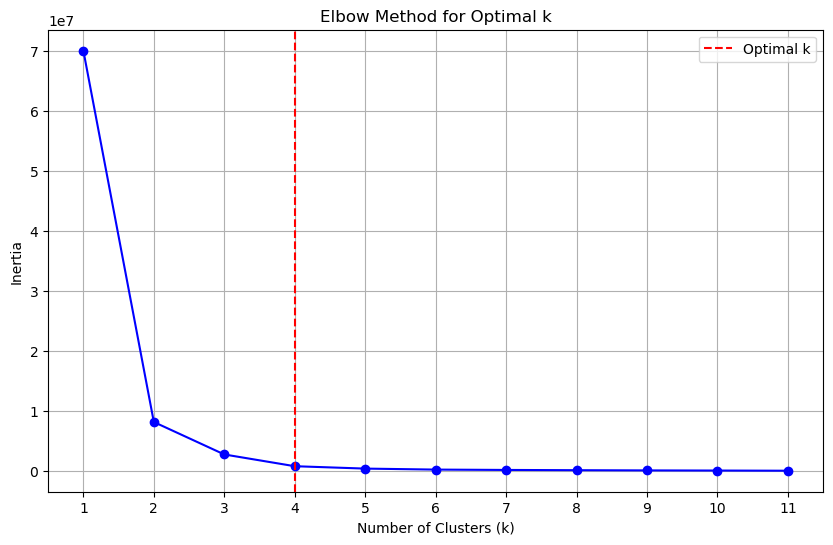

In [153]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
optimal_k = 4

plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid()
plt.axvline(x=optimal_k, color='r', linestyle='--', label='Optimal k')
plt.legend()
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [154]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)


In [155]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_df[['PC1', 'PC2', 'PC3']])

(pca_df.head())


c:\Users\ReisH\anaconda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,PC1,PC2,PC3
0,-341.800963,-51.366775,12.525471
1,-249.420466,24.117548,-14.231466
2,-402.614721,-118.710737,24.838397
3,-406.752437,-79.487286,1.566331
4,-382.429948,-103.431959,16.753073


In [156]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = kmeans_model.predict(pca_df[['PC1', 'PC2', 'PC3']])  # Use the PCA columns


# Print the resulting array of cluster values.
(predicted_clusters)


array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 3, 0, 0, 0, 2])

In [157]:
# Create a copy of the DataFrame with the PCA data
pca_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_copy['Predicted_Cluster'] = predicted_clusters


# Display sample data
(pca_copy.sample(5))

,PC1,PC2,PC3,Predicted_Cluster
31,-389.140428,-116.155069,0.891223,0
26,-378.208662,-34.321847,-25.265565,0
16,-255.261261,-124.797933,17.121792,0
15,-256.458443,-127.902916,-21.983027,0
22,-377.733744,-110.558329,16.228922,0


In [158]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
scatter_plot = pca_copy.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    c='Predicted_Cluster',
    cmap='viridis',
    title='PCA Scatter Plot of Cryptocurrencies',
    xlabel='PCA1',
    ylabel='PCA2',
    size=100, 
    alpha=0.7
)
scatter_plot


DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['PCA1', 'PCA2']

PandasInterface expects tabular data, for more information on supported datatypes see https://holoviews.org/user_guide/Tabular_Datasets.html

### Determine the Weights of Each Feature on each Principal Component

In [ ]:
# Use the columns from the original scaled DataFrame as the index.


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    